In [138]:
import numpy as np
import matplotlib.pyplot as plt

## Not closed Version

In [139]:
def KappaBinormal( curve: np.array ):
        curveTangent = np.gradient(curve)[1]
        curveNormal = np.gradient(curveTangent)[1]
        curveBinormal = np.cross(curveTangent,curveNormal, axisa=0, axisb=0, axisc=0)

        Kappa = np.divide( np.linalg.norm( curveBinormal,axis=0 ), np.power( np.linalg.norm(curveTangent,axis=0),3 ) )

        KBApprox = np.multiply(Kappa, curveBinormal)

        return KBApprox

In [140]:
def updateKappaBinorm(curve: np.array, tspan: list, numOfSteps: int):
    curves = np.zeros( (numOfSteps + 1, curve.shape[0], curve.shape[1]) )
    curves[0,:,:] = curve

    for i in range( 1, numOfSteps + 1 ):
        curves[i,:,:] = curves[i-1,:,:] + (tspan[-1] - tspan[0])/numOfSteps*KappaBinormal(curves[i-1,:,:])
    
    return curves

In [141]:
# Make the Pringle function
P = lambda t: [ np.cos(t), np.sin(t), np.square(np.cos(t)) - np.square(np.sin(t)) ]
PPoints = np.linspace( 0, 2 * np.pi, 200, endpoint=False )

# Find values on the pringle
s = np.array( P(PPoints) )

tspan = [0,200]
numOfSteps = 1000
curves = updateKappaBinorm(s, tspan, numOfSteps)

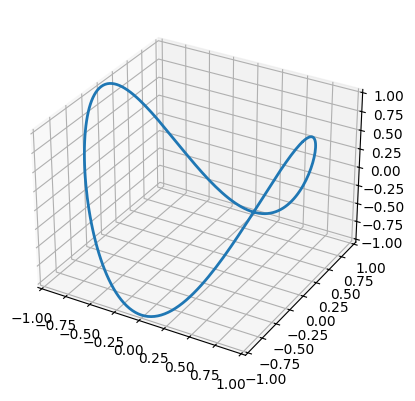

In [142]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Assuming 'curves' is your NumPy array with the shape (1001, 3, 200)
# curves = np.random.rand(1001, 3, 200)  # Example initialization

# Set up the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the axes properties (adjust these limits according to your data)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
# Initialize an empty line plot
line, = ax.plot([], [], [], lw=2)

# Update function for the animation
def update(frame):
    # Update the data of the line plot
    line.set_data(curves[frame, 0, :], curves[frame, 1, :])
    line.set_3d_properties(curves[frame, 2, :])
    return line

# Create the animation
ani = FuncAnimation(fig, update, frames=range(0,len(curves),25), blit=False)

HTML(ani.to_jshtml())

### Testing Enpoints of the derivative of the curve

By reparametrizing the circle to move the endpoint of the circle, we can show that the problem is with the numerical derivative.

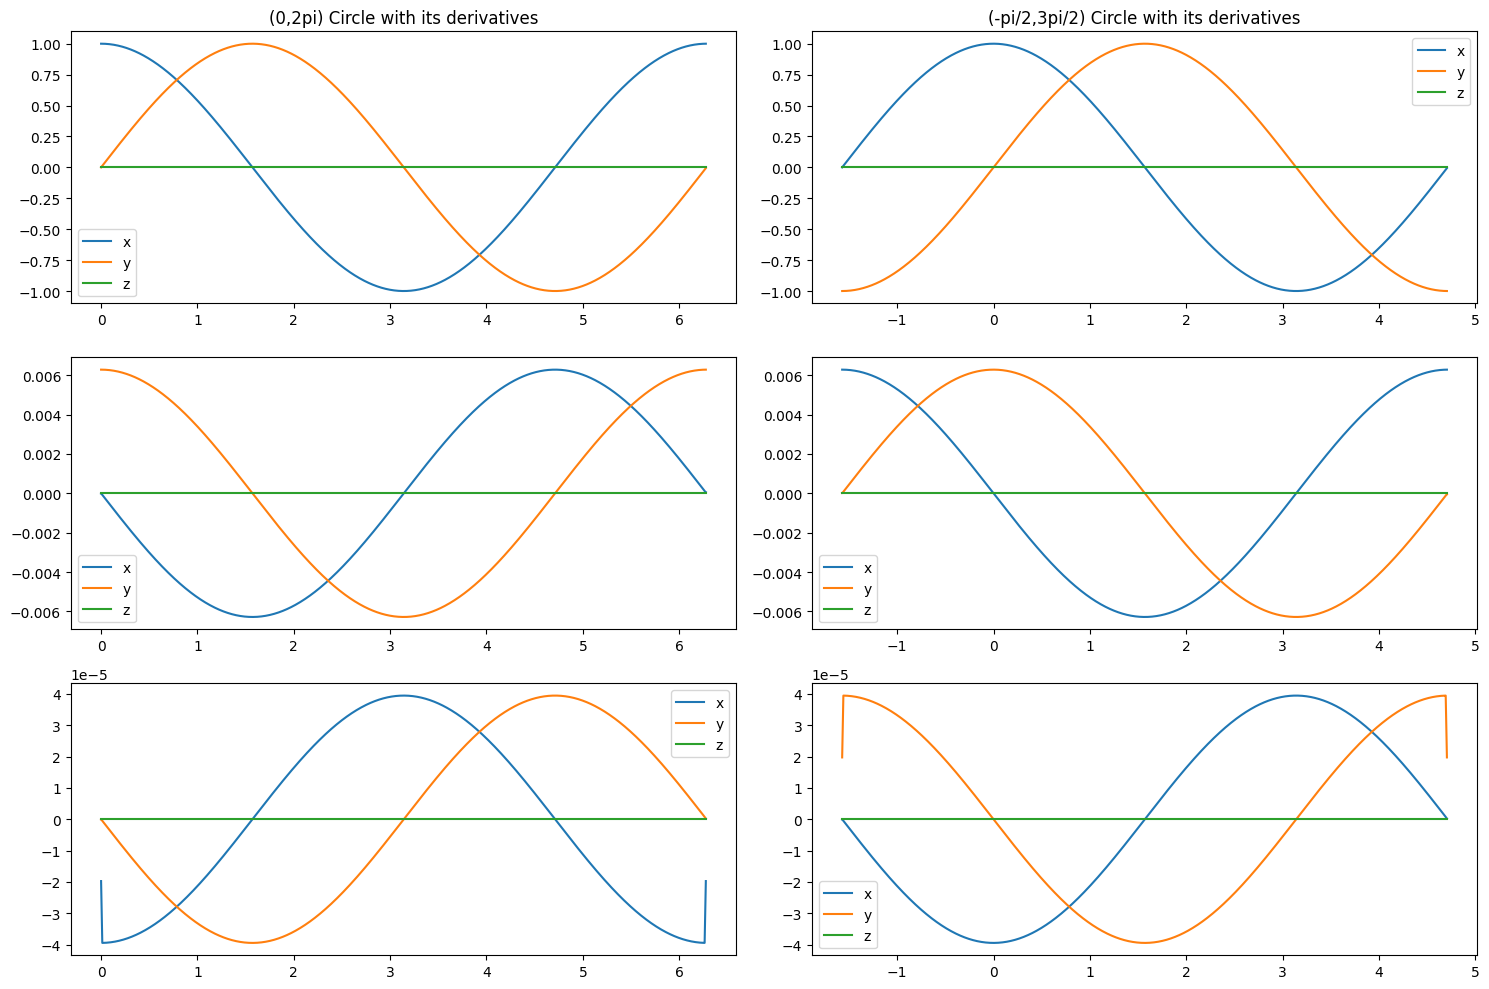

In [143]:
# Define the filament shape
circle = lambda t : [np.cos(t), np.sin(t), t * 0]
circlePoints1 = np.linspace(0,2*np.pi,1000, endpoint=False)
circlePoints2 = np.linspace(-np.pi/2,3*np.pi/2,1000, endpoint=False)

# Generate the circles to test
s1 = np.array(circle(circlePoints1))
s2 = np.array(circle(circlePoints2))

# Calculate the derivatives using np.gradient
ds1 = np.gradient(s1)[1]
ds2 = np.gradient(s2)[1]

# Calculate the second derivatives
dds1 = np.gradient(ds1)[1]
dds2 = np.gradient(ds2)[1]

# Plot the curves with their derivatives
fig, axs = plt.subplots(3, 2, figsize=(15, 10))  # 2 rows, 2 columns

axs[0,0].set_title('(0,2pi) Circle with its derivatives')
axs[0,0].plot(circlePoints1, s1[0,:])
axs[0,0].plot(circlePoints1, s1[1,:])
axs[0,0].plot(circlePoints1, s1[2,:])
axs[0,0].legend(['x','y','z'])

axs[0,1].set_title('(-pi/2,3pi/2) Circle with its derivatives')
axs[0,1].plot(circlePoints2, s2[0,:])
axs[0,1].plot(circlePoints2, s2[1,:])
axs[0,1].plot(circlePoints2, s2[2,:])
axs[0,1].legend(['x','y','z'])

axs[1,0].plot(circlePoints1, ds1[0,:])
axs[1,0].plot(circlePoints1, ds1[1,:])
axs[1,0].plot(circlePoints1, ds1[2,:])
axs[1,0].legend(['x','y','z'])

axs[1,1].plot(circlePoints2, ds2[0,:])
axs[1,1].plot(circlePoints2, ds2[1,:])
axs[1,1].plot(circlePoints2, ds2[2,:])
axs[1,1].legend(['x','y','z'])

axs[2,0].plot(circlePoints1, dds1[0,:])
axs[2,0].plot(circlePoints1, dds1[1,:])
axs[2,0].plot(circlePoints1, dds1[2,:])
axs[2,0].legend(['x','y','z'])

axs[2,1].plot(circlePoints2, dds2[0,:])
axs[2,1].plot(circlePoints2, dds2[1,:])
axs[2,1].plot(circlePoints2, dds2[2,:])
axs[2,1].legend(['x','y','z'])

plt.tight_layout()
plt.show()

You can see in the 2nd derivative graph, that there is a jump in points where it ought to look like a smooth sine/cosine curve.

## Closed Version

In [150]:
import numpy as np
import matplotlib.pyplot as pl

In [145]:
def closedFirstGradient(f: np.array, t: np.array = None) -> np.array:
    if t is None:
        t = np.linspace(0,1,f.shape[1],endpoint=False)
    
    # Define the time step for every value of t
    h = np.roll(t, -1) - t
    h[-1] = h[0]

    num = -np.roll(f, -2, axis=1) + 8*np.roll(f, -1, axis=1) - 8*np.roll(f, 1, axis=1) + np.roll(f, 2, axis=1)
    den = 12 * h
    grad = np.divide(num,den)

    return grad
    
def closedSecondGradient(f: np.array, t: np.array = None):
    if t is None:
        t = np.linspace(0,1,f.shape[1],endpoint=False)

    fPlusOne = np.roll( f, -1, axis=1 )
    fMinusOne = np.roll( f, 1, axis=1 )

    # Define the time step for every value of t
    h = np.roll(t, -1) - t
    h[-1] = h[0]

    num = -np.roll(f, -2, axis=1) + 16*np.roll(f, -1, axis=1) -30*f + 16*np.roll(f, 1, axis=1) - np.roll(f, 2, axis=1)
    den = 12*np.power(h,2)
    grad = num/den

    return grad

def KappaBinormal( curve: np.array, t: np.array ):
    curveTangent = closedFirstGradient(curve, t)
    curveNormal = closedSecondGradient(curve, t)
    curveBinormal = np.cross(curveTangent,curveNormal, axisa=0, axisb=0, axisc=0)

    Kappa = np.divide( np.linalg.norm( curveBinormal, axis=0 ), np.power( np.linalg.norm(curveTangent, axis=0),3 ) )

    KBApprox = np.multiply(Kappa, curveBinormal)

    return KBApprox

In [146]:
def updateKappaBinormClosed(curve: np.array, t: np.array, tspan: list, numOfSteps: int):
    curves = np.zeros( (numOfSteps + 1, curve.shape[0], curve.shape[1]) )
    curves[0,:,:] = curve

    for i in range( 1, numOfSteps + 1 ):
        curves[i,:,:] = curves[i-1,:,:] + (tspan[-1] - tspan[0])/numOfSteps*KappaBinormal(curves[i-1,:,:], t)
    
    return curves

In [147]:
# # Make the Pringle function
# P = lambda t: [ np.cos(t), np.sin(t), np.square(np.cos(t)) - np.square(np.sin(t)) ]
# PPoints = np.linspace( 0, 2 * np.pi, 200,endpoint=False )

# # Find values on the pringle
# s = np.array( P(PPoints) )
t = np.linspace(-np.pi,np.pi,1000,endpoint=False)
f = lambda t: [np.cos(t), np.sin(t),t*0]
s = np.array(f(t))


tspan = [0,5]
numOfSteps = 10
curves = updateKappaBinormClosed(s, t, tspan, numOfSteps)

/home/danielkrawciw/.local/lib/python3.12/site-packages/numpy/linalg/linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/tmp/ipykernel_31188/1013551472.py:37: RuntimeWarning: overflow encountered in power
  Kappa = np.divide( np.linalg.norm( curveBinormal, axis=0 ), np.power( np.linalg.norm(curveTangent, axis=0),3 ) )
/tmp/ipykernel_31188/1013551472.py:37: RuntimeWarning: invalid value encountered in divide
  Kappa = np.divide( np.linalg.norm( curveBinormal, axis=0 ), np.power( np.linalg.norm(curveTangent, axis=0),3 ) )
/tmp/ipykernel_31188/1013551472.py:39: RuntimeWarning: invalid value encountered in multiply
  KBApprox = np.multiply(Kappa, curveBinormal)
/tmp/ipykernel_31188/1013551472.py:9: RuntimeWarning: invalid value encountered in add
  num = -np.roll(f, -2, axis=1) + 8*np.roll(f, -1, axis=1) - 8*np.roll(f, 1, axis=1) + np.roll(f, 2, axis=1)
/tmp/ipykernel_31188/1013551472.py:9: RuntimeWarning: invalid value encountered in subtract
  num 

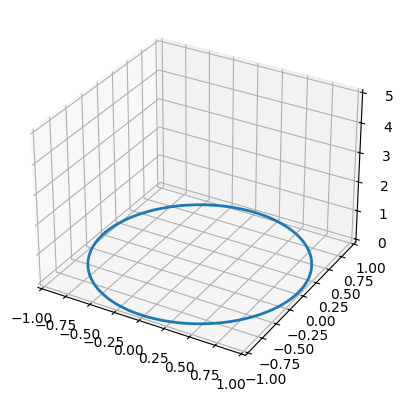

In [148]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Assuming 'curves' is your NumPy array with the shape (1001, 3, 200)
# curves = np.random.rand(1001, 3, 200)  # Example initialization

# Set up the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the axes properties (adjust these limits according to your data)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([0,5])
# Initialize an empty line plot
line, = ax.plot([], [], [], lw=2)

# Update function for the animation
def update(frame):
    # Update the data of the line plot
    line.set_data(curves[frame, 0, :], curves[frame, 1, :])
    line.set_3d_properties(curves[frame, 2, :])
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(curves)), blit=False)

HTML(ani.to_jshtml())

### Testing the Closed Gradient Function

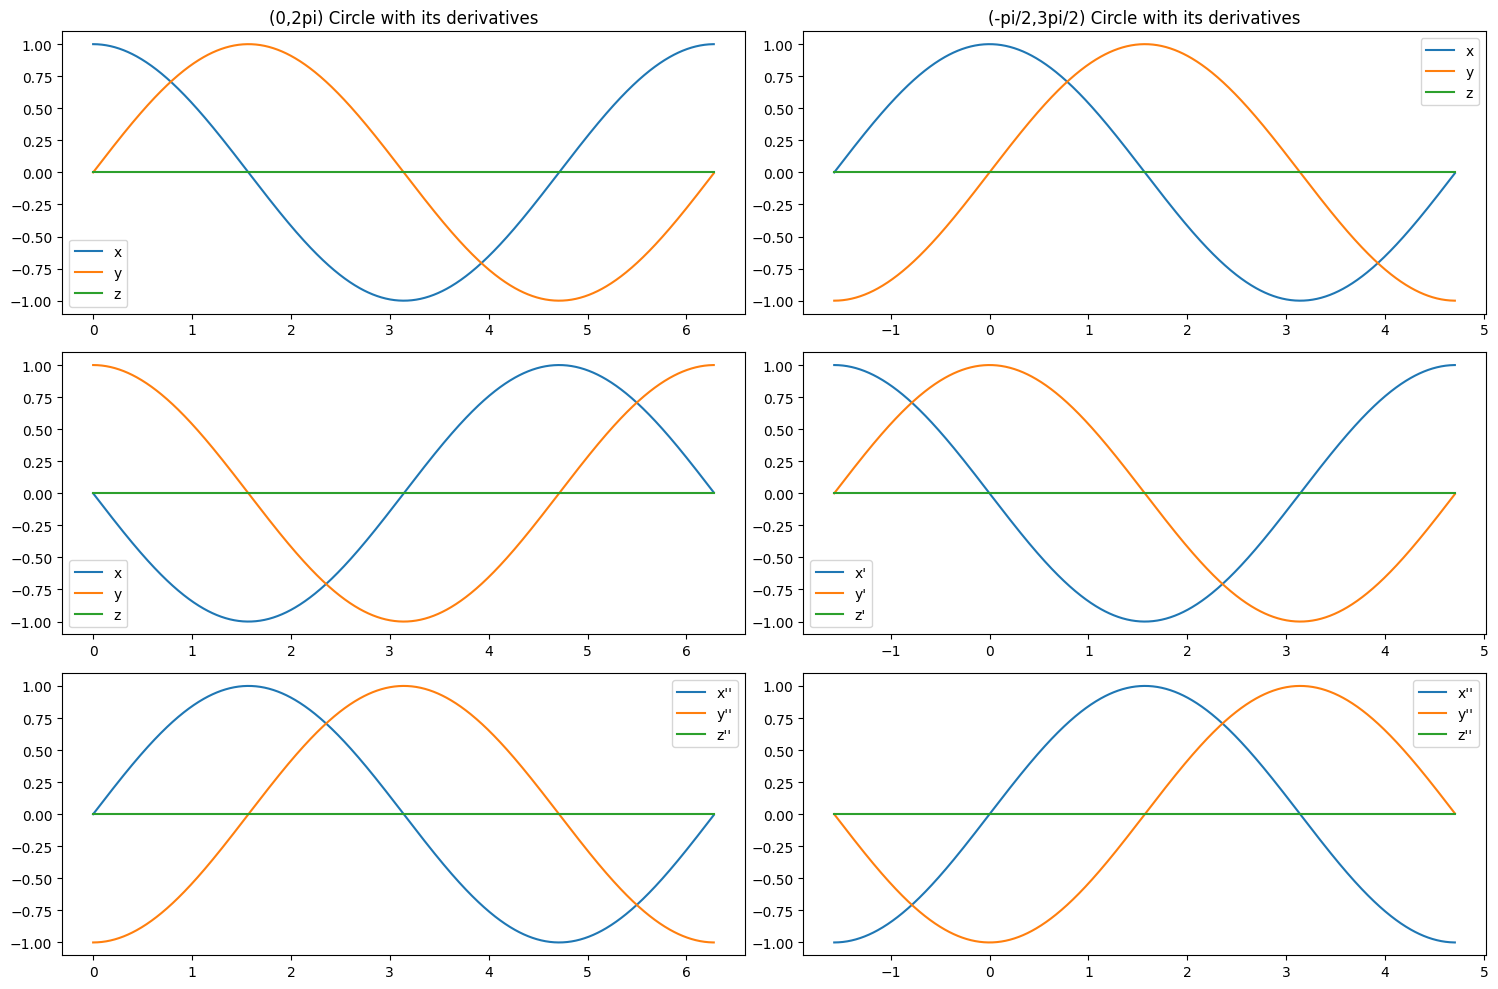

In [149]:
# Define the filament shape
circle = lambda t : [np.cos(t), np.sin(t), t * 0]
circlePoints1 = np.linspace(0,2*np.pi,1000, endpoint=False)
circlePoints2 = np.linspace(-np.pi/2,3*np.pi/2,1000, endpoint=False)

# Generate the circles to test
s1 = np.array(circle(circlePoints1))
s2 = np.array(circle(circlePoints2))

# Calculate the derivatives using np.gradient
ds1 = closedFirstGradient(s1, circlePoints1)
ds2 = closedFirstGradient(s2, circlePoints2)

# Calculate the second derivatives
dds1 = closedSecondGradient(ds1,circlePoints1)
dds2 = closedSecondGradient(ds2,circlePoints2)

# Plot the curves with their derivatives
fig, axs = plt.subplots(3, 2, figsize=(15, 10))  # 2 rows, 2 columns

axs[0,0].set_title('(0,2pi) Circle with its derivatives')
axs[0,0].plot(circlePoints1, s1[0,:])
axs[0,0].plot(circlePoints1, s1[1,:])
axs[0,0].plot(circlePoints1, s1[2,:])
axs[0,0].legend(['x','y','z'])

axs[0,1].set_title('(-pi/2,3pi/2) Circle with its derivatives')
axs[0,1].plot(circlePoints2, s2[0,:])
axs[0,1].plot(circlePoints2, s2[1,:])
axs[0,1].plot(circlePoints2, s2[2,:])
axs[0,1].legend(['x','y','z'])

axs[1,0].plot(circlePoints1, ds1[0,:])
axs[1,0].plot(circlePoints1, ds1[1,:])
axs[1,0].plot(circlePoints1, ds1[2,:])
axs[1,0].legend(['x','y','z'])

axs[1,1].plot(circlePoints2, ds2[0,:])
axs[1,1].plot(circlePoints2, ds2[1,:])
axs[1,1].plot(circlePoints2, ds2[2,:])
axs[1,1].legend(['x\'','y\'','z\''])

axs[2,0].plot(circlePoints1, dds1[0,:])
axs[2,0].plot(circlePoints1, dds1[1,:])
axs[2,0].plot(circlePoints1, dds1[2,:])
axs[2,0].legend(['x\'\'','y\'\'','z\'\''])

axs[2,1].plot(circlePoints2, dds2[0,:])
axs[2,1].plot(circlePoints2, dds2[1,:])
axs[2,1].plot(circlePoints2, dds2[2,:])
axs[2,1].legend(['x\'\'','y\'\'','z\'\''])

plt.tight_layout()
plt.show()